<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-gerardoaaron_castanedajaramillo/blob/main/Actividad%20Semanal%20--%207%20Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

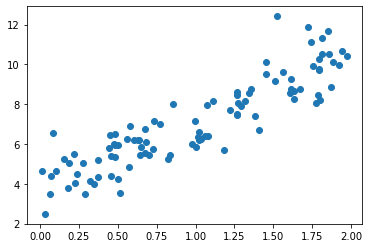

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

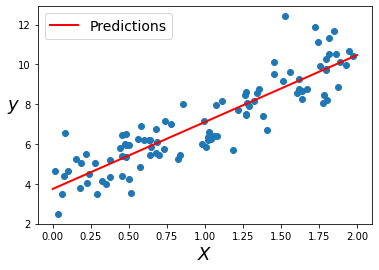

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

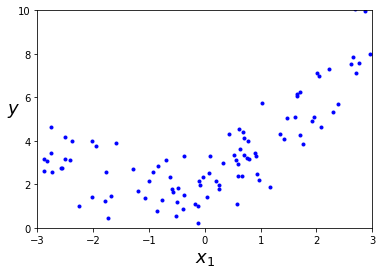

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.998940
1,4.320418
2,2.599923
3,2.175267
4,0.447174
...,...
95,0.565325
96,2.759217
97,3.314489
98,3.124415


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00],
       [ 4.25427011e-01,  1.80988142e-01],
       [-2.88979418e+00,  8.35091039e+00],
       [-1.05861711e-01,  1.12067018e-02],
       [-1.73790252e+00,  3.02030517e+00],
       [-9.23900594e-01,  8.53592308e-01],
       [ 1.65482841e+00,  2.73845708e+00],
       [ 2.64742503e+00,  7.00885927e+00],
       [-2.56550237e+00,  6.58180240e+00],
       [ 2.05453236e-01,  4.22110321e-02],
       [ 2.29520091e+00,  5.26794724e+00],
       [-2.50494879e+00,  6.27476846e+00],
       [ 1.94708428e+00,  3.79113720e+00],
       [-8.53191894e-01,  7.27936409e-01],
       [-1.06743179e+00,  1.13941062e+00],
       [ 2.86479832e+00,  8.20706940e+00],
       [-1.79484546e+00,  3.22147023e+00],
       [ 1.15916364e+00,  1.34366036e+00],
       [ 1.92864437e+00,  3.71966910e+00],
       [-2.75289903e+00,  7.57845306e+00],
       [ 1.02231275e+00,  1.04512336e+00],
       [ 2.70929985e+00,  7.34030566e+00],
       [-2.25468020e+00,  5.08358280e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.89643337, 0.48819444]]), array([2.09460069]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

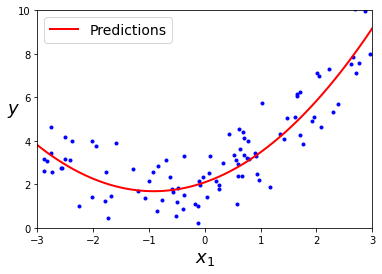

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [8]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
597,4.787700,33.916306
700,5.139742,38.849155
632,4.946467,36.827384
586,4.724777,35.449822
602,4.798105,40.280771
154,3.112526,35.130281
65,2.502705,44.442539
745,5.314816,29.963480
478,4.342330,30.460253
67,2.520240,61.879641


In [9]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [ ]:
len(X)

1000

In [10]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

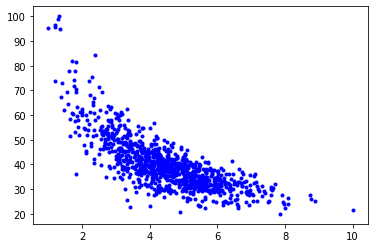

In [11]:
plt.plot(X,y,'b.')

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

### Regresión Lineal

Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.

* Modelo generado (ecuación)

Entrenamos el modelo:

In [65]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

LinearRegression()

Obtenemos coeficientes e intercepción con el eje:

In [66]:
def coef_inter(model):
  print('Coeficientes:', model.coef_)
  print('Intercept:', model.intercept_)

In [67]:
coef_inter(linear_reg)

Coeficientes: [-5.98882699]
Intercept: 66.83650741226988


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [68]:
def predict_ys(model,xt,xp):
  return model.predict(xt), model.predict(xp)

In [69]:
yhat_train, yhat_test = predict_ys(linear_reg, X_train, X_test)

* Visualización

In [70]:
def visualizacion(x_p, y_p, x_model, y_model):
  plt.scatter(x_p, y_p)
  plt.plot(x_model, y_model, "r-", linewidth=2, label="Predictions")
  plt.xlabel("$X$", fontsize=18)
  plt.ylabel("$y$", rotation=0, fontsize=18)
  plt.legend(loc="upper left", fontsize=14);

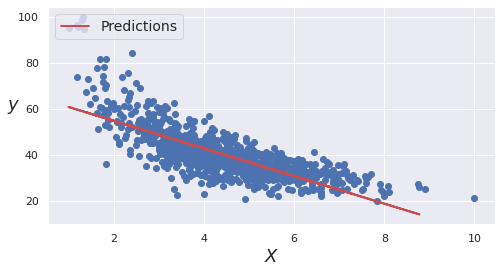

In [71]:
visualizacion(X, y, X_test, yhat_test)

* Sus errores y r cuadrada

In [35]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [50]:
def errores(y_train, yhat_train, y_test, yhat_test):
  errores_train = list()
  errores_train.append(metrics.mean_absolute_error(y_train, yhat_train))
  errores_train.append(np.sqrt(metrics.mean_squared_error(y_train, yhat_train)))
  errores_train.append(r2_score(y_train, yhat_train))
  errores_train.append(y_train - yhat_train)

  errores_test = list()
  errores_test.append(metrics.mean_absolute_error(y_test, yhat_test))
  errores_test.append(np.sqrt(metrics.mean_squared_error(y_test, yhat_test)))
  errores_test.append(r2_score(y_test, yhat_test))
  errores_test.append(y_test - yhat_test)

  return errores_train, errores_test

In [72]:
error_ejercicio1_train = list()
error_ejercicio1_test = list()

errores_test = list()
nom_errores = ['MAE', 'RMSE', 'R2']

errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.905332101451236
RMSE de train: 6.844866083710475
R2 de train: 0.5746524649404298
MAE de train: 5.013587781954963
RMSE de train: 7.108963321847682
R2 de train: 0.6116251549562579


### Regresión Polinomial

Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

* Modelo generado (ecuación)

In [54]:
from sklearn.preprocessing import PolynomialFeatures

In [55]:
def poly_transform(x, xt, xp, deg):
  poly_features = PolynomialFeatures(degree=deg, include_bias=False)
  X_poly = poly_features.fit(x)
  return X_poly.transform(xt), X_poly.transform(xp)

In [73]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [74]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly_train, y_train)

LinearRegression()

In [75]:
coef_inter(lin_reg)

Coeficientes: [-16.40638102   1.13136095]
Intercept: 88.80179909112496


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [76]:
yhat_train, yhat_test = predict_ys(lin_reg, X_poly_train, X_poly_test)

* Visualización

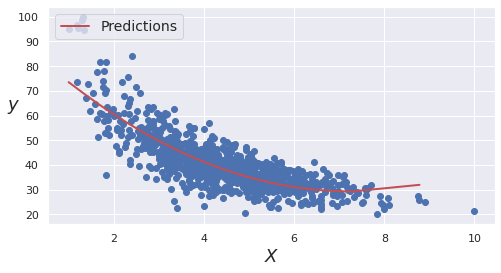

In [77]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = yhat_test[order]

visualizacion(X, y, sortedX, sorted_pred)

* Sus errores y r cuadrada

In [78]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.545086474348086
RMSE de train: 6.162532575212149
R2 de train: 0.6552276217097528
MAE de train: 4.3833025759681075
RMSE de train: 5.832771301068423
R2 de train: 0.7385501224942537


### Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.

### Ridge

In [79]:
from sklearn.linear_model import Ridge

* Modelo generado (ecuación)

In [80]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [93]:
ridge_model = Ridge(alpha = 10)
ridge_model.fit(X_poly_train, y_train)

Ridge(alpha=10)

In [94]:
coef_inter(ridge_model)

Coeficientes: [-14.35249765   0.91811959]
Intercept: 84.25748545190552


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [95]:
yhat_train, yhat_test = predict_ys(ridge_model, X_poly_train, X_poly_test)

* Visualización

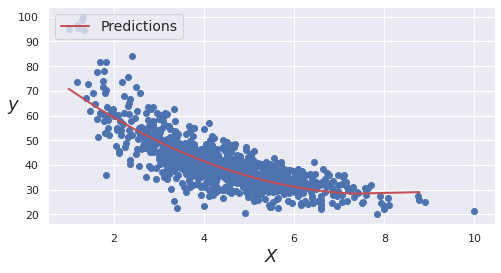

In [96]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = yhat_test[order]

visualizacion(X, y, sortedX, sorted_pred)

* Sus errores y r cuadrada

In [97]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.517916499060817
RMSE de train: 6.189226153362644
R2 de train: 0.6522343261500281
MAE de train: 4.397899036894618
RMSE de train: 5.979429627583081
R2 de train: 0.7252371174424325


### Lasso

In [101]:
from sklearn.linear_model import Lasso

* Modelo generado (ecuación)

In [102]:
X_poly_train, X_poly_test = poly_transform(X, X_train, X_test, 2)

In [111]:
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_poly_train, y_train)

Lasso(alpha=0.1)

In [112]:
coef_inter(lasso_model)

Coeficientes: [-14.9666674    0.98129183]
Intercept: 85.62928041192495


Obtenemos sus predicciones para datos de entrenamiento, y datos de prueba:

In [113]:
yhat_train, yhat_test = predict_ys(lasso_model, X_poly_train, X_poly_test)

* Visualización

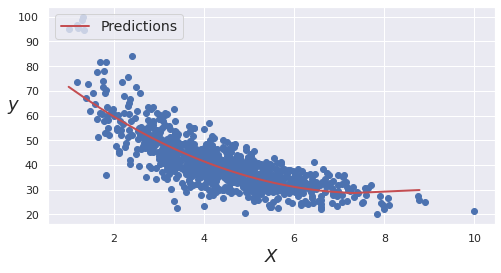

In [114]:
order = np.argsort(X_test.values.ravel())
sortedX = X_test.values.ravel()[order]
sortedY = y_test.values[order]
sorted_pred = yhat_test[order]

visualizacion(X, y, sortedX, sorted_pred)

* Sus errores y r cuadrada

In [115]:
errores_train = list()
errores_test = list()
errores_train, errores_test = errores(y_train,yhat_train,y_test,yhat_test)
error_ejercicio1_train.append(errores_train)
error_ejercicio1_test.append(errores_test)

i = 0
for error in nom_errores:
  print(error, 'de train:', errores_train[i])
  i = i + 1
i = 0
for error in nom_errores:
  print(error, 'de train:', errores_test[i])
  i = i + 1

MAE de train: 4.522065264122638
RMSE de train: 6.175668320741421
R2 de train: 0.6537562561963224
MAE de train: 4.385055190168516
RMSE de train: 5.9291087345437985
R2 de train: 0.72984228403894


### Finalmente grafica

* MAE (de los cuatro métodos)

Text(0.5, 1.0, 'MAE')

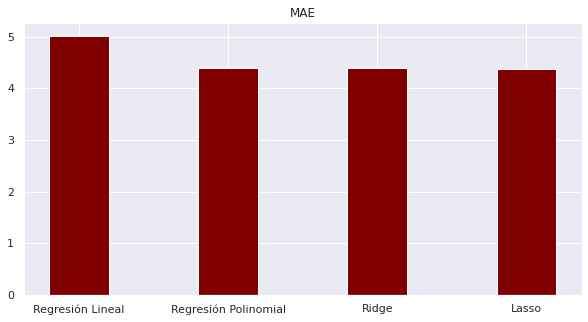

In [122]:
modelos_ejercicio1 = ['Regresión Lineal','Regresión Polinomial','Ridge','Lasso']

mae_values = list()
for i in range(0,len(modelos_ejercicio1)):
  mae_values.append(error_ejercicio1_test[i][0])

plt.figure(figsize = (10, 5))
plt.bar(modelos_ejercicio1, mae_values, color ='maroon', width = 0.4)
plt.title("MAE")

* R2 (de los cuatro métodos)

Text(0.5, 1.0, 'R2')

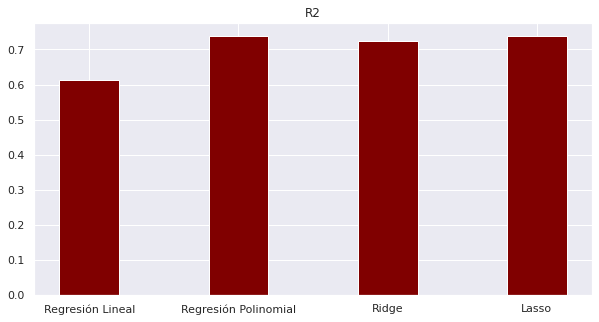

In [123]:
r2_values = list()
for i in range(0,len(modelos_ejercicio1)):
  r2_values.append(error_ejercicio1_test[i][2])

plt.figure(figsize = (10, 5))
plt.bar(modelos_ejercicio1, r2_values, color ='maroon', width = 0.4)
plt.title("R2")

### Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

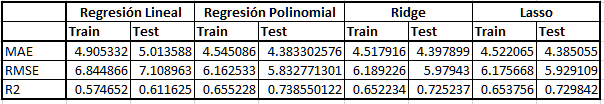

A primera vista, podemos ver que, para el valor de MAE, para todos menos para regresión lineal, sus valores disminuyen cuando se usan los datos de prueba. Para RMSE sucede lo mismo. Y para R2, en todos los modelos incrementa con los datos de prueba contra los de entrenamiento. Así mismo, el mejor valor de R2 es el de regresión lineal polinomial, así como de MAE y de RMSE. Por lo que se le recomienda a la empresa la regresión polinomial de grado 2. 

Veamos ahora sus errores:


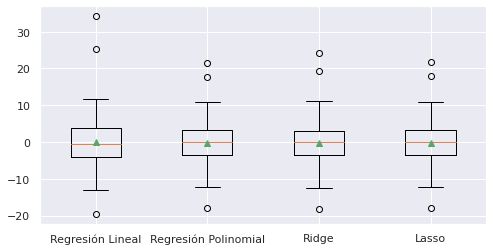

In [124]:
residuos_values = list()
for i in range(0,len(modelos_ejercicio1)):
  residuos_values.append(error_ejercicio1_test[i][3])

sns.set(rc={'figure.figsize':(8,4)})
plt.boxplot(residuos_values, labels=modelos_ejercicio1, showmeans=True)
plt.show()

Podemos observar que todos son muy similares, y con datos atípicos. Sin embargo, el de regresión lineal es que nos arroja los valores atípicos mas altos. Lo cual reafirma, considerando las métricas, que el mejor modelo a recomendar es el de regresión polinomial de grado 2. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

In [ ]:
#tu codigo aquí